# Estudio del oscilador parametrico.

Considere un pendulo periodicamente perturbado cuya ecuacion de movimiento es

\begin{equation}
    \ddot{x} = (\alpha + \beta \cos{t})\sin{x}
\end{equation}

Es conveniente introducir $ \dot{x} = y$ para convertir la ecuacion anterior en el sistema

\begin{array}\\
\dot{x} & = & y \\
\dot{y} & = & (\alpha + \beta \cos{t})\sin{x}
\end{array}

In [2]:
using PyPlot
include("Taylor2.jl")
using ADT, ODE

Antes de comenzar, analicemos el comportamiento del integrador de Taylor comparado con `ode78` definido en el modulo ODE al integrar la trayectoria de un pendulo simple. Esto con el fin de comprobar que el integrador funciona.

\begin{array}\\
\dot{x} & = & y \\
\dot{y} & = & -\sin{x}
\end{array}

In [1]:
function pendulo(t, x̄)
    
    dx = x̄[2]
    dy = -sin(x̄[1])
    
    return [dx; dy]
end

pendulo (generic function with 1 method)

Damos las condiciones iniciales y el intervalo de integracion.

In [3]:
x̄pendulo = [1.0, 0.0]
t0, tf = 0.0, 10 * pi
t = linspace(t0, tf, 10000);

In [4]:
tode, solode = ode78(pendulo, x̄pendulo, t);

In [5]:
ttay, soltay = integradorT2(pendulo, x̄pendulo, t0, tf);

In [6]:
xode = map(y -> y[1], solode)
yode = map(y -> y[2], solode);

xtay = map(y -> y[1], soltay)
ytay = map(y -> y[2], soltay);

Definimos la funcion E(x, y) que calcula la energia del pendulo como 
$$E = \frac{1}{2}y^2  + (1 - \cos{x})$$

In [7]:
E(x, y) = 0.5 * y^2 + (1 - cos(x))

E (generic function with 1 method)

In [8]:
E(1.0, 0.0) ## Energia inicial.

0.45969769413186023

In [9]:
Eode = E.(xode, yode)
Etay = E.(xtay, ytay);

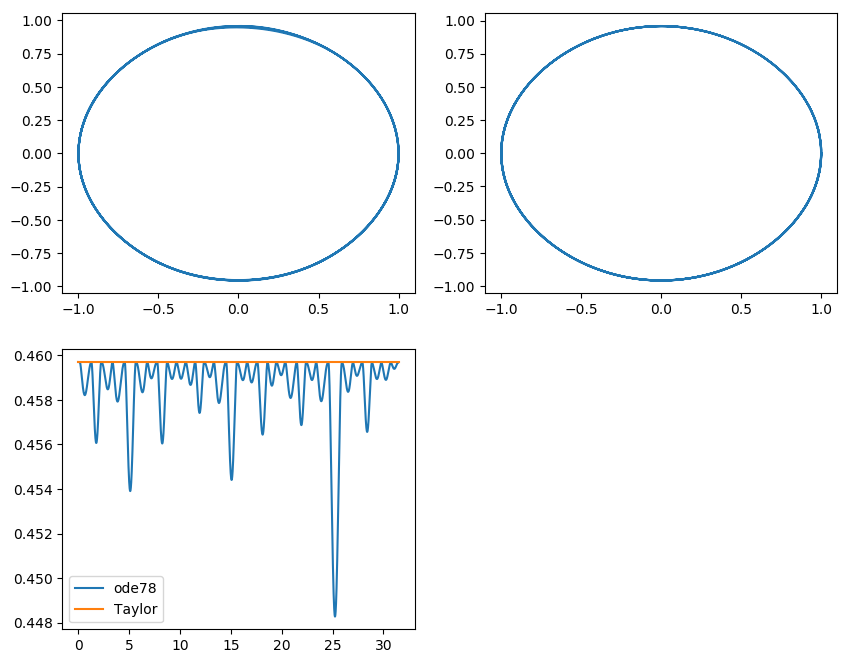

PyObject <matplotlib.legend.Legend object at 0x7f1bed82c3c8>

In [10]:
fig = figure(figsize = (10, 8))

ax = subplot(221); bx = subplot(222)
cx = subplot(223);

ax[:plot](xode, yode); bx[:plot](xtay, ytay)
cx[:plot](tode, Eode, label = "ode78"); cx[:plot](ttay, Etay, label = "Taylor"); 
cx[:legend]()

Vemos que los resultados obtenidos con el integrador de Taylor son mucho mas precisos, esto se ve relejado en la invarianza de la energia del pendulo.

Ahora analizamos los resultados de los integradores en el oscilador parametrico.

In [11]:
## Definimos el oscilador parametrico.

function ψ(t, x̄)
    
    dx = x̄[2]
    dy = (α + β * cos(t)) * sin(x̄[1])
    
    return [dx; dy]
end

ψ (generic function with 1 method)

In [12]:
x̄param = [0.0, 1.0] #Punto inicial Q_0
t0 = 0.0
tf = 50 * pi

α = 1.0
β = 10.0

t = linspace(t0, tf, 10000);

In [13]:
tode_param, solode_param = ode78(ψ, x̄param, t);

In [14]:
ttay_param, soltay_param = integradorT2(ψ, x̄param, t0, tf);

In [15]:
xode_param = map(y -> y[1], solode_param)
yode_param = map(y -> y[2], solode_param);

xtay_param = map(y -> y[1], soltay_param)
ytay_param = map(y -> y[2], soltay_param);

In [16]:
E(x, y, t) = 0.5 * y^2 + (1 - (α + β * cos(t)) * cos(x))

E (generic function with 2 methods)

In [17]:
E(0.0, 1.0, 0.0)

-9.5

In [18]:
Eode_param = E.(xode_param, yode_param, tode_param)
Etay_param = E.(xtay_param, ytay_param, ttay_param);

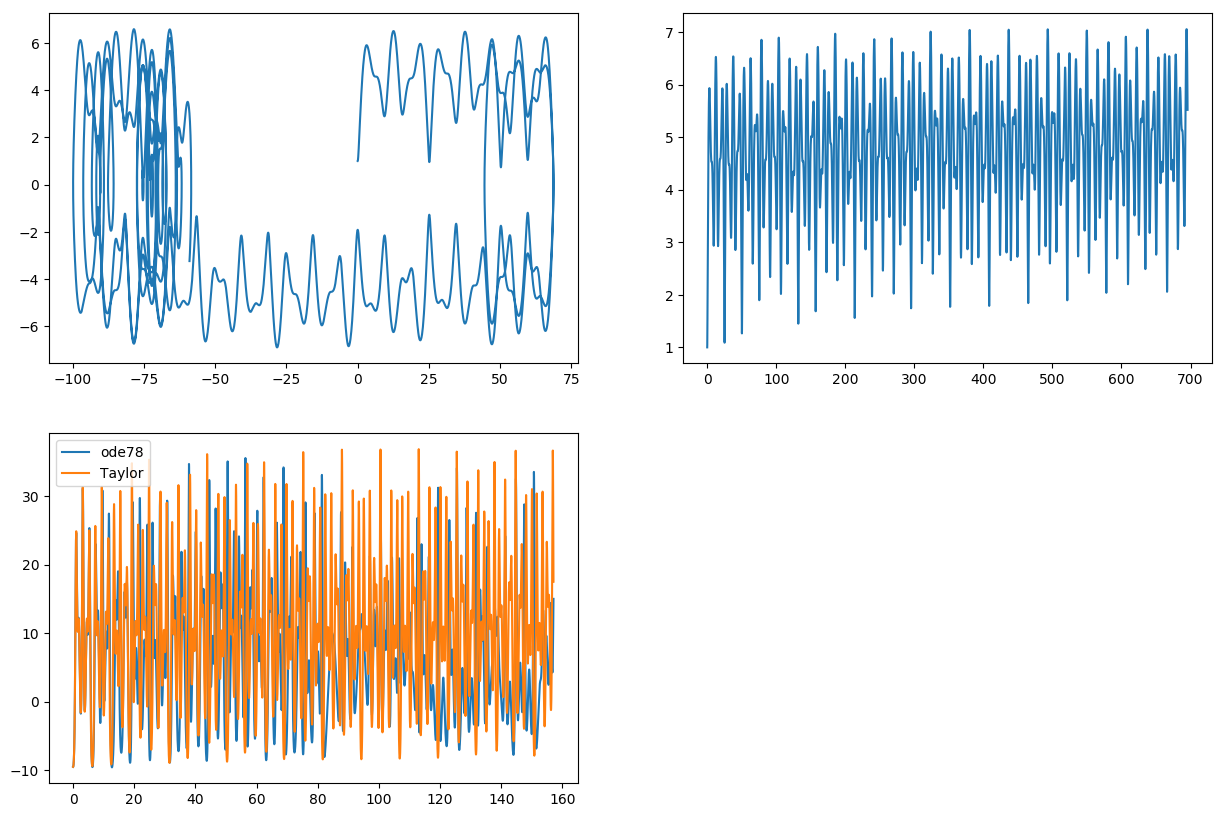

PyObject <matplotlib.legend.Legend object at 0x7f975681dcc0>

In [19]:
fig = figure(figsize = (15, 10))

ax = subplot(221); 
bx = subplot(222);
cx = subplot(223);
ax[:plot](xode_param, yode_param); 
bx[:plot](xtay_param, ytay_param)
cx[:plot](tode_param, Eode_param, label = "ode78"); cx[:plot](ttay_param, Etay_param, label = "Taylor"); 
cx[:legend]()

De los resultados anteriores podemos ver que para un tiempo relativamente grande, el integrador ode78 pierde presicion.

In [ ]:
#=p0 = [0.0, 2.0]
puntos = [p0]
α, β = 1.0, 0.0

for i = 0:1000

#     tp = linspace(i * 2 * pi, (i + 1) * 2 *pi)
#     t, sol = ode78(ψ, p0, tp)

    t, sol = integradorT2(ψ, p0, i * 2 * pi ,(i + 1) * 2 *pi)

    push!(puntos, sol[end])

    p0 = sol[end]
    t0 = t[end]
end

m = map(x -> x[1], puntos)
n = map(x -> x[2], puntos);=#

In [ ]:
#plot(m,n, markersize=1, ".", color = "black")

------

In [49]:
v=[[0.0,2],[2,6],[2,10],[2,20],[10,0]];
v1=[[0.0,2],[0,6],[0,10],[0,20],[80,0]]

5-element Array{Array{Float64,1},1}:
 [0.0,2.0] 
 [0.0,6.0] 
 [0.0,10.0]
 [0.0,20.0]
 [80.0,0.0]

In [32]:

function ψ(t, x̄)
    
    dx = x̄[2]
    dy = (α + β * cos(t)) * sin(x̄[1])
    
    return [dx; dy]
end

ψ (generic function with 1 method)

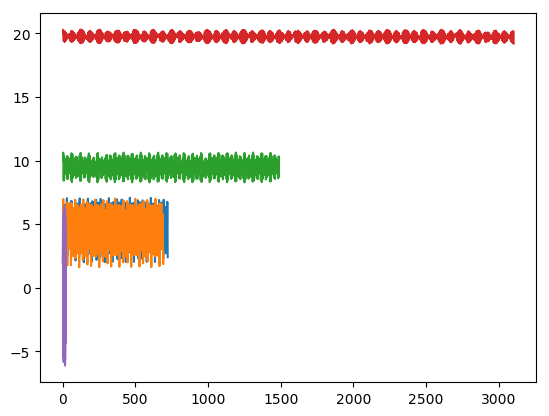

In [51]:
for i=1:length(v)
    
    x̄=v[i]
    tode_param, solode_param = ode78(ψ, x̄, t)
    
    xode_param = map(y -> y[1], solode_param)
    yode_param = map(y -> y[2], solode_param)
    
   #fig = figure(figsize = (15, 10))

    ax = subplot(111) 

    ax[:plot](xode_param, yode_param)
end

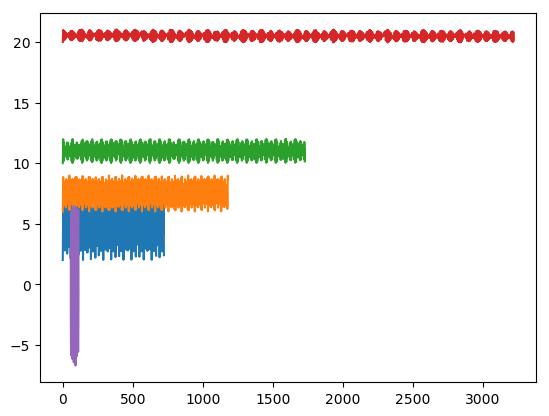

In [52]:
for i=1:length(v)
    
    x̄=v1[i]
    tode_param, solode_param = ode78(ψ, x̄, t)
    
    xode_param = map(y -> y[1], solode_param)
    yode_param = map(y -> y[2], solode_param)
    
   #fig = figure(figsize = (15, 10))

    ax = subplot(111) 

    ax[:plot](xode_param, yode_param)
end

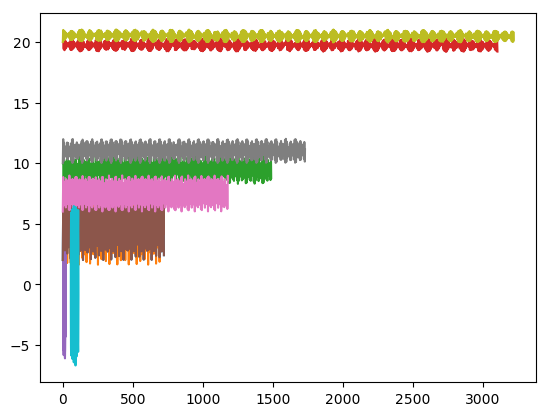

In [50]:
for i=1:length(v)
    
    x̄=v[i]
    tode_param, solode_param = ode78(ψ, x̄, t)
    
    xode_param = map(y -> y[1], solode_param)
    yode_param = map(y -> y[2], solode_param)
    
   #fig = figure(figsize = (15, 10))

    ax = subplot(111) 

    ax[:plot](xode_param, yode_param)
end
   #= ψ(t, x̄)xtay_param = map(y -> y[1], soltay_param)
    
    ytay_param = map(y -> y[2], soltay_param);
    ttay_param, soltay_param = integradorT2(ψ, x̄param, t0, tf);
    
    subplot(221)
    ax[:plot](xtay_param, ytay_param)=#
        
for i=1:length(v)
    
    x̄=v1[i]
    tode_param, solode_param = ode78(ψ, x̄, t)
    
    xode_param = map(y -> y[1], solode_param)
    yode_param = map(y -> y[2], solode_param)
    
   #fig = figure(figsize = (15, 10))

    ax = subplot(111) 

    ax[:plot](xode_param, yode_param)
end

------

In [28]:
#Función del oscilardor paramétrico

function oscilador(t,x̄)
    
    dx = x̄[2]
    dy = (α + β * cos(t)) * sin(x̄[1])
    
    return [dx; dy]
end

oscilador (generic function with 2 methods)

In [21]:
#Posición inicial
x̄param = [0.0, 1.0]; #Punto inicial Q_0 del algoritmo

In [240]:
#Tiempo a partir de t0 y tf

t0=0
tf=50 * pi
t = linspace(t0, tf, 10000);

In [241]:
α1=linspace(0, 10, 100);
β1=linspace(0, 10, 100);

In [244]:
for i=1:length(α1)
    α = α1[i]
    β = β1[i]

    tode_param, solode_param = ode78(ψ, x̄param, t)
    #ttay_param, soltay_param = integradorT2(ψ, x̄param, t0, tf);
end

In [245]:
xode_param = map(y -> y[1], solode_param)
yode_param = map(y -> y[2], solode_param);

In [246]:
length(yode_param)

10656

In [247]:
yy=yode_param[1:10000];

In [248]:
solucion=reshape(yy,100,100); #debe ser (vector,length(alfa),length(alfa))

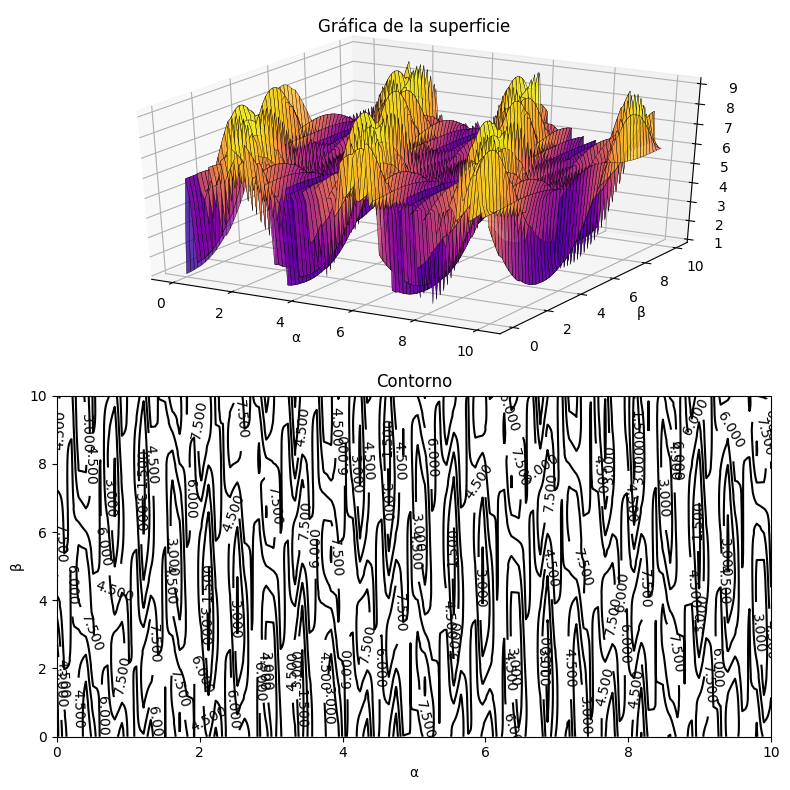

In [249]:
xgrid = repmat(α1',length(α1),1);
ygrid = repmat(β1,1,length(β1));

cuadricula = 2
gamma_de_color = ColorMap("plasma") #https://matplotlib.org/examples/color/colormaps_reference.html
transparencia = 0.8
grosor_de_linea = 0.25
altura = 2
dimensiones = 1

fig = figure("pyplot_surfaceplot",figsize=(8,8))
ax = fig[:add_subplot](altura,dimensiones,1, projection = "3d")
ax[:plot_surface](xgrid, ygrid,solucion, rstride=cuadricula,edgecolors="k", cstride=cuadricula, cmap=gamma_de_color, alpha=transparencia, linewidth=grosor_de_linea)
xlabel("α")
ylabel("β")
title("Gráfica de la superficie")


subplot(212)
ax = fig[:add_subplot](2,1,2)
cp = ax[:contour](xgrid, ygrid,solucion,colors="black", linewidth=2.0)
ax[:clabel](cp, inline=1, fontsize=10)
xlabel("α")
ylabel("β")
title("Contorno")
tight_layout()